In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

<h2>1. Modelling with all the features</h2>

In [2]:
df_train = pd.read_csv("df_train_whole.csv").drop(columns='Unnamed: 0')
df_test = pd.read_csv("df_test_whole.csv").drop(columns='Unnamed: 0')

In [3]:
train_labels = df_train['class']
test_labels = df_test['class']
df_train.drop(columns='class',inplace=True)
df_test.drop(columns='class',inplace=True)

<h2>1.1 Naive Bayes Classifier</h2>

In [11]:
params = {'var_smoothing':[0.001,0.005,0.01,0.05,0.1]}
gnb = GaussianNB()
clf = GridSearchCV(gnb, params,scoring='f1')
clf.fit(df_train,train_labels)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.001, 0.005, 0.01, 0.05, 0.1]},
             scoring='f1')

In [12]:
clf.cv_results_['mean_test_score']

array([0.93408817, 0.95330713, 0.95626141, 0.94467846, 0.90706361])

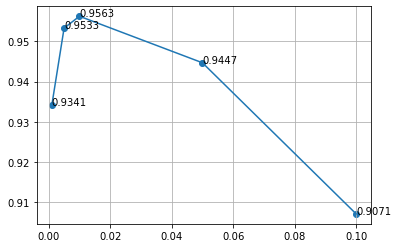

In [13]:
plt.plot(params['var_smoothing'],clf.cv_results_['mean_test_score'])
plt.scatter(params['var_smoothing'],clf.cv_results_['mean_test_score'])
for i in range(len(params['var_smoothing'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['var_smoothing'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [14]:
#Getting the best value of the hyper-parameters
var_smoothing = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['var_smoothing']


In [15]:
gnb = GaussianNB(var_smoothing = var_smoothing)
gnb.fit(df_train,train_labels)
y_pred = gnb.predict(df_test)

In [16]:
confusion_matrix(test_labels,y_pred)

array([[9104,  607],
       [4138, 8691]], dtype=int64)

In [25]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred))
print("Test precision::",precision_score(test_labels,y_pred))
print("Test recall::",recall_score(test_labels,y_pred))
print("Test F1::",f1_score(test_labels,y_pred))

Test Accuracy:: 0.7894853593611357
Test precision:: 0.9347171434717143
Test recall:: 0.6774495284121911
Test F1:: 0.7855561079224477


<h2>1.2 KNN Classifier</h2>

In [54]:
params = {'n_neighbors':[3,5,7,9,11]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params,scoring='f1', n_jobs=-1)
clf.fit(df_train,train_labels)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1')

In [56]:
clf.cv_results_['mean_test_score']

array([0.99611812, 0.99557034, 0.9950661 , 0.99444153, 0.99426919])

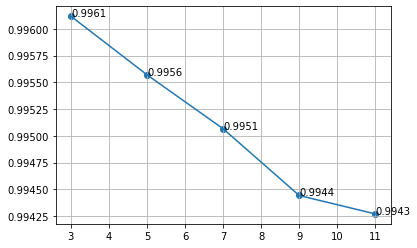

In [57]:
plt.plot(params['n_neighbors'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_neighbors'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_neighbors'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_neighbors'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [58]:
#Getting the best value of the hyper-parameters
n_neighbors = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_neighbors']

In [60]:
knn = KNeighborsClassifier(n_neighbors = n_neighbors)
knn.fit(df_train,train_labels)
y_pred_knn_whole = knn.predict(df_test)

In [91]:
confusion_matrix(test_labels,y_pred_knn_whole)

array([[9023,  688],
       [4463, 8366]], dtype=int64)

In [64]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_knn_whole))
print("Test precision::",precision_score(test_labels,y_pred_knn_whole))
print("Test recall::",recall_score(test_labels,y_pred_knn_whole))
print("Test F1::",f1_score(test_labels,y_pred_knn_whole))

Test Accuracy:: 0.7714729370008873
Test precision:: 0.9240114866357411
Test recall:: 0.6521162990100553
Test F1:: 0.764611799113467


<h2>1.3 Logistic Regression Classifier</h2>

In [65]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
lr = LogisticRegression()
clf = GridSearchCV(lr, params,scoring='f1')
clf.fit(df_train,train_labels)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001]}, scoring='f1')

In [66]:
clf.cv_results_['mean_test_score']

array([0.97007737, 0.96803401, 0.96881705, 0.96108223, 0.89800151])

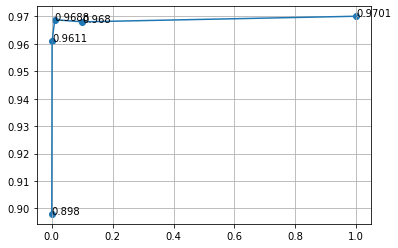

In [67]:
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [68]:
#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

In [69]:
lr = LogisticRegression(C = C)
lr.fit(df_train,train_labels)
y_pred_lr_whole = lr.predict(df_test)

In [70]:
confusion_matrix(test_labels,y_pred_lr_whole)

array([[8990,  721],
       [4829, 8000]], dtype=int64)

In [71]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_lr_whole))
print("Test precision::",precision_score(test_labels,y_pred_lr_whole))
print("Test recall::",recall_score(test_labels,y_pred_lr_whole))
print("Test F1::",f1_score(test_labels,y_pred_lr_whole))

Test Accuracy:: 0.75377107364685
Test precision:: 0.9173259947253756
Test recall:: 0.6235871852833424
Test F1:: 0.7424593967517402


<h2>1.4 Support Vector Classifier</h2>

In [72]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
svc = SVC()
clf = GridSearchCV(svc, params,scoring='f1')
clf.fit(df_train,train_labels)

GridSearchCV(estimator=SVC(), param_grid={'C': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1')

In [73]:
clf.cv_results_['mean_test_score']

array([0.98474043, 0.97747822, 0.97394611, 0.95290657, 0.88162472])

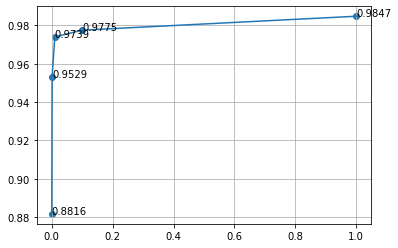

In [74]:
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [75]:
#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

In [84]:
svc = SVC(C = C)
svc.fit(df_train,train_labels)
y_pred_svc_whole = svc.predict(df_test)

In [85]:
confusion_matrix(test_labels,y_pred_svc_whole)

array([[9008,  703],
       [4633, 8196]], dtype=int64)

In [89]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_svc_whole))
print("Test precision::",precision_score(test_labels,y_pred_svc_whole))
print("Test recall::",recall_score(test_labels,y_pred_svc_whole))
print("Test F1::",f1_score(test_labels,y_pred_svc_whole))

Test Accuracy:: 0.763265306122449
Test precision:: 0.9210023598157097
Test recall:: 0.6388650713227844
Test F1:: 0.754418262150221


<h2>1.5 Decision Tree Classifier</h2>

In [79]:
params = {'min_samples_split':[2,4,6,8,10]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, params,scoring='f1')
clf.fit(df_train,train_labels)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_split': [2, 4, 6, 8, 10]}, scoring='f1')

In [80]:
clf.cv_results_['mean_test_score']

array([0.99715991, 0.99716801, 0.99703959, 0.99698843, 0.99682643])

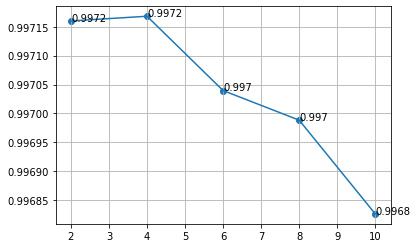

In [81]:
plt.plot(params['min_samples_split'],clf.cv_results_['mean_test_score'])
plt.scatter(params['min_samples_split'],clf.cv_results_['mean_test_score'])
for i in range(len(params['min_samples_split'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['min_samples_split'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [83]:
#Getting the best value of the hyper-parameters
min_samples_split = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['min_samples_split']

In [87]:
dtc = DecisionTreeClassifier(min_samples_split = min_samples_split)
dtc.fit(df_train,train_labels)
y_pred_dtc_whole = dtc.predict(df_test)

In [88]:
confusion_matrix(test_labels,y_pred_dtc_whole)

array([[8943,  768],
       [4077, 8752]], dtype=int64)

In [90]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_dtc_whole))
print("Test precision::",precision_score(test_labels,y_pred_dtc_whole))
print("Test recall::",recall_score(test_labels,y_pred_dtc_whole))
print("Test F1::",f1_score(test_labels,y_pred_dtc_whole))

Test Accuracy:: 0.7850488021295474
Test precision:: 0.9193277310924369
Test recall:: 0.6822043806999766
Test F1:: 0.7832117768132802


<h2>1.6 Random Forest Classifier</h2>

In [92]:
params = {'n_estimators':[100,500,1000,1500,2000]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, params,scoring='f1')
clf.fit(df_train,train_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 500, 1000, 1500, 2000]},
             scoring='f1')

In [93]:
clf.cv_results_['mean_test_score']

array([0.99813066, 0.99821613, 0.99819907, 0.99814782, 0.99816489])

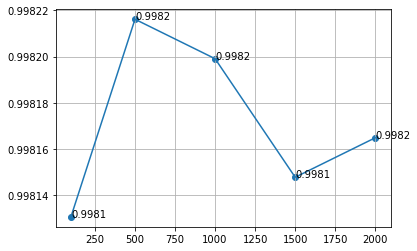

In [94]:
plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [95]:
#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

In [98]:
rfc = RandomForestClassifier(n_estimators = n_estimators)
rfc.fit(df_train,train_labels)
y_pred_rfc_whole = rfc.predict(df_test)

In [99]:
confusion_matrix(test_labels,y_pred_rfc_whole)

array([[9443,  268],
       [4693, 8136]], dtype=int64)

In [100]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_rfc_whole))
print("Test precision::",precision_score(test_labels,y_pred_rfc_whole))
print("Test recall::",recall_score(test_labels,y_pred_rfc_whole))
print("Test F1::",f1_score(test_labels,y_pred_rfc_whole))

Test Accuracy:: 0.779902395740905
Test precision:: 0.9681104236078059
Test recall:: 0.6341881674331592
Test F1:: 0.766354259878491


<h2>1.7 GBDT Classifier</h2>

In [104]:
params = {'n_estimators':[100,500,1000,1500,2000]}
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, params,scoring='f1')
clf.fit(df_train,train_labels)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [100, 500, 1000, 1500, 2000]},
             scoring='f1')

In [105]:
clf.cv_results_['mean_test_score']

array([0.99299052, 0.99707208, 0.99780744, 0.99794412, 0.99796128])

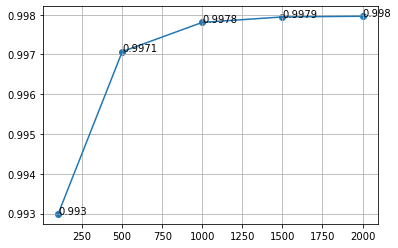

In [106]:
plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [107]:
#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

In [108]:
gbc = GradientBoostingClassifier(n_estimators = n_estimators)
gbc.fit(df_train,train_labels)
y_pred_gbc_whole = gbc.predict(df_test)

In [109]:
confusion_matrix(test_labels,y_pred_gbc_whole)

array([[9375,  336],
       [4206, 8623]], dtype=int64)

In [131]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_gbc_whole))
print("Test precision::",precision_score(test_labels,y_pred_gbc_whole))
print("Test recall::",recall_score(test_labels,y_pred_gbc_whole))
print("Test F1::",f1_score(test_labels,y_pred_gbc_whole))

Test Accuracy:: 0.79849157054126
Test precision:: 0.962495814264985
Test recall:: 0.6721490373372827
Test F1:: 0.791536625665504


<h2>1.8 MLP Classifier</h2>

In [136]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Dense(6256, activation = 'relu',kernel_initializer = 'he_normal',input_shape = (df_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())


optimizer = Adam(learning_rate=.001)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

history = model.fit(
   df_train,train_labels,    
   epochs =20, 
   verbose = 1, 
   validation_split = 0.3, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]
)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 6256)              763232    
_________________________________________________________________
dropout_14 (Dropout)         (None, 6256)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 256)               1601792   
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)             

In [139]:
y_pred_mlp_whole = model.predict_classes(df_test)

In [140]:
confusion_matrix(test_labels,y_pred_mlp_whole)

array([[9428,  283],
       [4473, 8356]], dtype=int64)

In [141]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_mlp_whole))
print("Test precision::",precision_score(test_labels,y_pred_mlp_whole))
print("Test recall::",recall_score(test_labels,y_pred_mlp_whole))
print("Test F1::",f1_score(test_labels,y_pred_mlp_whole))

Test Accuracy:: 0.7889973380656611
Test precision:: 0.9672415788864452
Test recall:: 0.6513368150284512
Test F1:: 0.7784609651574436


<h2>2. Modelling with manually selected features</h2>

In [5]:
df_train = pd.read_csv("df_train_manual.csv").drop(columns='Unnamed: 0')
df_test = pd.read_csv("df_test_manual.csv").drop(columns='Unnamed: 0')

<h2>2.1 Naive Bayes Classifier</h2>

In [145]:
params = {'var_smoothing':[0.001,0.005,0.01,0.05,0.1]}
gnb = GaussianNB()
clf = GridSearchCV(gnb, params,scoring='f1')
clf.fit(df_train,train_labels)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.001, 0.005, 0.01, 0.05, 0.1]},
             scoring='f1')

In [146]:
clf.cv_results_['mean_test_score']

array([0.87031441, 0.93961998, 0.94524271, 0.94631405, 0.90870438])

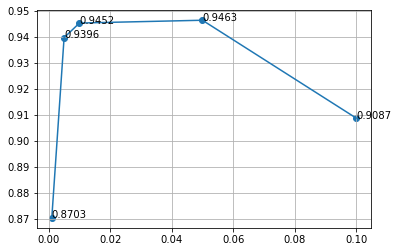

In [147]:
plt.plot(params['var_smoothing'],clf.cv_results_['mean_test_score'])
plt.scatter(params['var_smoothing'],clf.cv_results_['mean_test_score'])
for i in range(len(params['var_smoothing'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['var_smoothing'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [148]:
#Getting the best value of the hyper-parameters
var_smoothing = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['var_smoothing']

In [149]:
gnb = GaussianNB(var_smoothing = var_smoothing)
gnb.fit(df_train,train_labels)
y_pred_gnb_manual = gnb.predict(df_test)

In [150]:
confusion_matrix(test_labels,y_pred_gnb_manual)

array([[9492,  219],
       [5071, 7758]], dtype=int64)

In [151]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_gnb_manual))
print("Test precision::",precision_score(test_labels,y_pred_gnb_manual))
print("Test recall::",recall_score(test_labels,y_pred_gnb_manual))
print("Test F1::",f1_score(test_labels,y_pred_gnb_manual))

Test Accuracy:: 0.7653061224489796
Test precision:: 0.9725460699511095
Test recall:: 0.6047236729285214
Test F1:: 0.7457464193021243


<h2>2.2 KNN Classifier</h2>

In [152]:
params = {'n_neighbors':[3,5,7,9,11]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params,scoring='f1', n_jobs=-1)
clf.fit(df_train,train_labels)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1')

In [153]:
clf.cv_results_['mean_test_score']

array([0.9825279 , 0.98250656, 0.98274303, 0.98203837, 0.98174159])

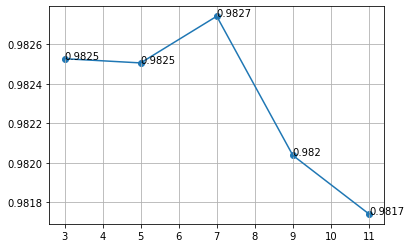

In [154]:
plt.plot(params['n_neighbors'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_neighbors'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_neighbors'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_neighbors'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

In [155]:
#Getting the best value of the hyper-parameters
n_neighbors = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_neighbors']

In [157]:
knn = KNeighborsClassifier(n_neighbors = n_neighbors)
knn.fit(df_train,train_labels)
y_pred_knn_manual = knn.predict(df_test)

In [158]:
confusion_matrix(test_labels,y_pred_knn_manual)

array([[8914,  797],
       [4533, 8296]], dtype=int64)

In [159]:
print("Test Accuracy::",accuracy_score(test_labels,y_pred_knn_manual))
print("Test precision::",precision_score(test_labels,y_pred_knn_manual))
print("Test recall::",recall_score(test_labels,y_pred_knn_manual))
print("Test F1::",f1_score(test_labels,y_pred_knn_manual))

Test Accuracy:: 0.7635314995563443
Test precision:: 0.9123501594633234
Test recall:: 0.6466599111388261
Test F1:: 0.7568652495210291


<h2>2.3 Logistic Regression Classifier</h2>

The average CV score against the five C values are: [0.9675006  0.96587281 0.96296503 0.95344837 0.8944589 ]
**************************************************
The plot of C vs F1 score


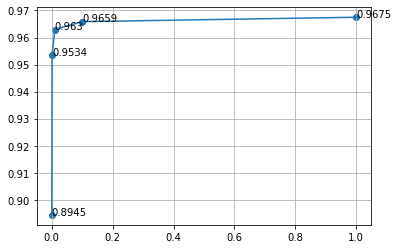

**************************************************
The confusion matrix for the test set is
[[8961  750]
 [4942 7887]]
Test Accuracy:: 0.7474711623779947
Test precision:: 0.9131642931573463
Test recall:: 0.6147790162912152
Test F1:: 0.734836485605143


In [161]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
lr = LogisticRegression()
clf = GridSearchCV(lr, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()
print("*"*50)
#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
lr = LogisticRegression(C = C)
lr.fit(df_train,train_labels)
y_pred_lr_manual = lr.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_lr_manual))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_lr_manual))
print("Test precision::",precision_score(test_labels,y_pred_lr_manual))
print("Test recall::",recall_score(test_labels,y_pred_lr_manual))
print("Test F1::",f1_score(test_labels,y_pred_lr_manual))

<h2>2.4 Support Vector Classifier</h2>

The average CV score against the five C values are: [0.9741021  0.97154397 0.96690546 0.94985964 0.88717045]
**************************************************
The plot of C vs F1 score


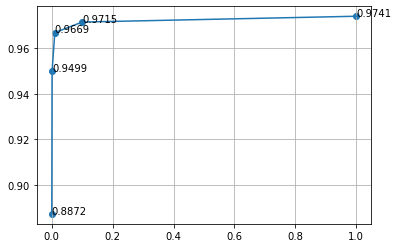

The confusion matrix for the test set is
[[9009  702]
 [4808 8021]]
Test Accuracy:: 0.7555456965394853
Test precision:: 0.9195230998509687
Test recall:: 0.6252241016447112
Test F1:: 0.7443392724573126


In [6]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
svc = SVC()
clf = GridSearchCV(svc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
svc = SVC(C = C)
svc.fit(df_train,train_labels)
y_pred_svc_manual = svc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_svc_manual))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_svc_manual))
print("Test precision::",precision_score(test_labels,y_pred_svc_manual))
print("Test recall::",recall_score(test_labels,y_pred_svc_manual))
print("Test F1::",f1_score(test_labels,y_pred_svc_manual))

<h2>2.5 Decision Tree Classifier</h2>

The average CV score against the five min_samples_split values are: [0.98318712 0.98340868 0.98321167 0.98339116 0.9834028 ]
**************************************************
The plot of min_samples_split vs F1 score


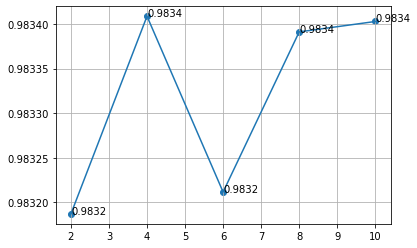

The confusion matrix for the test set is
[[9309  402]
 [4359 8470]]
Test Accuracy:: 0.7887755102040817
Test precision:: 0.9546889089269612
Test recall:: 0.6602229324187388
Test F1:: 0.7806091885166582


In [163]:
params = {'min_samples_split':[2,4,6,8,10]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five min_samples_split values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of min_samples_split vs F1 score")

plt.plot(params['min_samples_split'],clf.cv_results_['mean_test_score'])
plt.scatter(params['min_samples_split'],clf.cv_results_['mean_test_score'])
for i in range(len(params['min_samples_split'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['min_samples_split'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
min_samples_split = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['min_samples_split']

dtc = DecisionTreeClassifier(min_samples_split = min_samples_split)
dtc.fit(df_train,train_labels)
y_pred_dtc_manual = dtc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_dtc_manual))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_dtc_manual))
print("Test precision::",precision_score(test_labels,y_pred_dtc_manual))
print("Test recall::",recall_score(test_labels,y_pred_dtc_manual))
print("Test F1::",f1_score(test_labels,y_pred_dtc_manual))

<h2>2.6 Random Forest Classifier</h2>

The average CV score against the five n_estimators values are: [0.98478452 0.98508385 0.9851428  0.9850765  0.98505833]
**************************************************
The plot of n_estimators vs F1 score


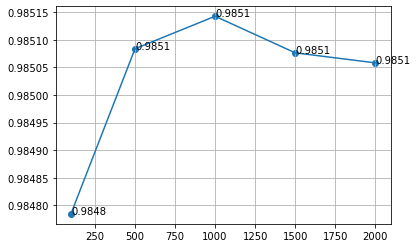

The confusion matrix for the test set is
[[9299  412]
 [4754 8075]]
Test Accuracy:: 0.7708074534161491
Test precision:: 0.9514551667255803
Test recall:: 0.6294333151453738
Test F1:: 0.7576468380559205


In [164]:
params = {'n_estimators':[100,500,1000,1500,2000]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

rfc = RandomForestClassifier(n_estimators = n_estimators)
rfc.fit(df_train,train_labels)
y_pred_rfc_manual = rfc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_rfc_manual))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_rfc_manual))
print("Test precision::",precision_score(test_labels,y_pred_rfc_manual))
print("Test recall::",recall_score(test_labels,y_pred_rfc_manual))
print("Test F1::",f1_score(test_labels,y_pred_rfc_manual))

<h2>2.7 GBDT Classifier</h2>


The average CV score against the five n_estimators values are: [0.97299039 0.98271245 0.98385203 0.98433207 0.98471782]
**************************************************
The plot of n_estimators vs F1 score


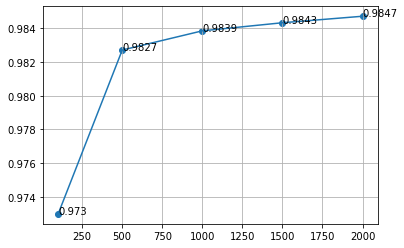

The confusion matrix for the test set is
[[9388  323]
 [4438 8391]]
Test Accuracy:: 0.7887755102040817
Test precision:: 0.9629332109249483
Test recall:: 0.6540650089640658
Test F1:: 0.779000139256371


In [166]:

params = {'n_estimators':[100,500,1000,1500,2000]}
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

gbc = GradientBoostingClassifier(n_estimators = n_estimators)
gbc.fit(df_train,train_labels)
y_pred_gbc_manual = gbc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gbc_manual))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gbc_manual))
print("Test precision::",precision_score(test_labels,y_pred_gbc_manual))
print("Test recall::",recall_score(test_labels,y_pred_gbc_manual))
print("Test F1::",f1_score(test_labels,y_pred_gbc_manual))

<h2>2.8 MLP Classifier</h2>

In [167]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Dense(6256, activation = 'relu',kernel_initializer = 'he_normal',input_shape = (df_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())


optimizer = Adam(learning_rate=.001)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

history = model.fit(
   df_train,train_labels,    
   epochs =20, 
   verbose = 1, 
   validation_split = 0.3, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]
)

y_pred_mlp_manual = model.predict_classes(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_mlp_manual))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_mlp_manual))
print("Test precision::",precision_score(test_labels,y_pred_mlp_manual))
print("Test recall::",recall_score(test_labels,y_pred_mlp_manual))
print("Test F1::",f1_score(test_labels,y_pred_mlp_manual))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 6256)              550528    
_________________________________________________________________
dropout_19 (Dropout)         (None, 6256)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 256)               1601792   
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)             

<h2>3. Modelling with features selected through Chi-squared and Anova test</h2>

In [4]:
df_train = pd.read_csv("df_train_chi_anova.csv").drop(columns='Unnamed: 0')
df_test = pd.read_csv("df_test_chi_anova.csv").drop(columns='Unnamed: 0')

<h2>3.1 Naive Bayes Classifier</h2>

The average CV score against the five var_smoothing values are: [0.89181959 0.94117843 0.94656438 0.94003859 0.90779114]
**************************************************
The plot of var_smoothing vs F1 score


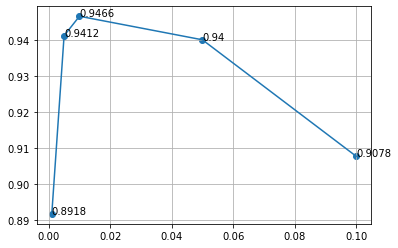

The confusion matrix for the test set is
[[9555  156]
 [4443 8386]]
Test Accuracy:: 0.7959627329192547
Test precision:: 0.9817372980566612
Test recall:: 0.6536752669732637
Test F1:: 0.7848018342613823


In [8]:
params = {'var_smoothing':[0.001,0.005,0.01,0.05,0.1]}
gnb = GaussianNB()
clf = GridSearchCV(gnb, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five var_smoothing values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of var_smoothing vs F1 score")

plt.plot(params['var_smoothing'],clf.cv_results_['mean_test_score'])
plt.scatter(params['var_smoothing'],clf.cv_results_['mean_test_score'])
for i in range(len(params['var_smoothing'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['var_smoothing'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
var_smoothing = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['var_smoothing']

gnb = GaussianNB(var_smoothing = var_smoothing)
gnb.fit(df_train,train_labels)
y_pred_gnb_chi_anova = gnb.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gnb_chi_anova))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gnb_chi_anova))
print("Test precision::",precision_score(test_labels,y_pred_gnb_chi_anova))
print("Test recall::",recall_score(test_labels,y_pred_gnb_chi_anova))
print("Test F1::",f1_score(test_labels,y_pred_gnb_chi_anova))

<h2>3.2 KNN Classifier</h2>

The average CV score against the five n_neighbors values are: [0.99051606 0.9899813  0.98951613 0.98861798 0.9878634 ]
**************************************************
The plot of n_neighbors vs F1 score


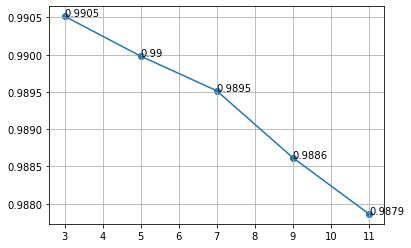

Test Accuracy:: 0.7856699201419698
Test precision:: 0.9205047318611987
Test recall:: 0.6823602774962975
Test F1:: 0.7837414387394244


In [9]:
params = {'n_neighbors':[3,5,7,9,11]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params,scoring='f1', n_jobs=-1)
clf.fit(df_train,train_labels)

print("The average CV score against the five n_neighbors values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_neighbors vs F1 score")

plt.plot(params['n_neighbors'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_neighbors'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_neighbors'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_neighbors'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_neighbors = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_neighbors']

knn = KNeighborsClassifier(n_neighbors = n_neighbors)
knn.fit(df_train,train_labels)
y_pred_knn_chi_anova = knn.predict(df_test)

confusion_matrix(test_labels,y_pred_knn_chi_anova)

print("Test Accuracy::",accuracy_score(test_labels,y_pred_knn_chi_anova))
print("Test precision::",precision_score(test_labels,y_pred_knn_chi_anova))
print("Test recall::",recall_score(test_labels,y_pred_knn_chi_anova))
print("Test F1::",f1_score(test_labels,y_pred_knn_chi_anova))

<h2>3.3 Logistic Regression Classifier</h2>

The average CV score against the five C values are: [0.966318   0.96570794 0.96350806 0.95673421 0.89663425]
**************************************************
The plot of C vs F1 score


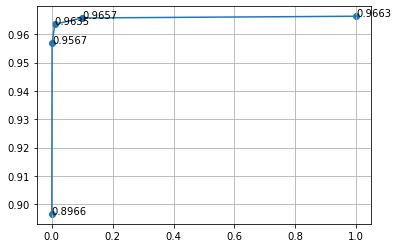

**************************************************
The confusion matrix for the test set is
[[8955  756]
 [4724 8105]]
Test Accuracy:: 0.7568766637089619
Test precision:: 0.9146823157657149
Test recall:: 0.6317717670901863
Test F1:: 0.7473490087597972


In [10]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
lr = LogisticRegression()
clf = GridSearchCV(lr, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()
print("*"*50)
#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
lr = LogisticRegression(C = C)
lr.fit(df_train,train_labels)
y_pred_lr_chi_anova = lr.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_lr_chi_anova))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_lr_chi_anova))
print("Test precision::",precision_score(test_labels,y_pred_lr_chi_anova))
print("Test recall::",recall_score(test_labels,y_pred_lr_chi_anova))
print("Test F1::",f1_score(test_labels,y_pred_lr_chi_anova))

<h2>3.4 Support Vector Classifier</h2>

The average CV score against the five C values are: [0.97769577 0.97243356 0.9639732  0.94962907 0.88487246]
**************************************************
The plot of C vs F1 score


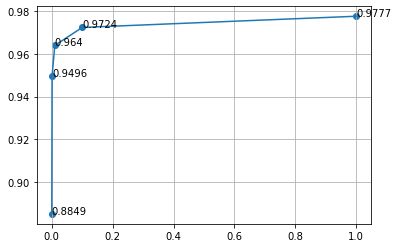

The confusion matrix for the test set is
[[9014  697]
 [4834 7995]]
Test Accuracy:: 0.7546140195208518
Test precision:: 0.9198113207547169
Test recall:: 0.6231974432925403
Test F1:: 0.7429952139770457


In [5]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
svc = SVC()
clf = GridSearchCV(svc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
svc = SVC(C = C)
svc.fit(df_train,train_labels)
y_pred_svc_chi_anova = svc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_svc_chi_anova))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_svc_chi_anova))
print("Test precision::",precision_score(test_labels,y_pred_svc_chi_anova))
print("Test recall::",recall_score(test_labels,y_pred_svc_chi_anova))
print("Test F1::",f1_score(test_labels,y_pred_svc_chi_anova))

<h2>3.5 Decision Tree Classifier</h2>

The average CV score against the five min_samples_split values are: [0.99039987 0.99033946 0.99057015 0.99059914 0.99046144]
**************************************************
The plot of min_samples_split vs F1 score


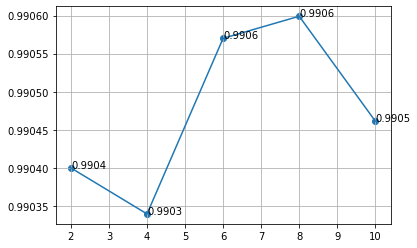

The confusion matrix for the test set is
[[9398  313]
 [4180 8649]]
Test Accuracy:: 0.8006654835847382
Test precision:: 0.9650747600981924
Test recall:: 0.6741756956894536
Test F1:: 0.7938139598916985


In [11]:
params = {'min_samples_split':[2,4,6,8,10]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five min_samples_split values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of min_samples_split vs F1 score")

plt.plot(params['min_samples_split'],clf.cv_results_['mean_test_score'])
plt.scatter(params['min_samples_split'],clf.cv_results_['mean_test_score'])
for i in range(len(params['min_samples_split'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['min_samples_split'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
min_samples_split = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['min_samples_split']

dtc = DecisionTreeClassifier(min_samples_split = min_samples_split)
dtc.fit(df_train,train_labels)
y_pred_dtc_chi_anova = dtc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_dtc_chi_anova))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_dtc_chi_anova))
print("Test precision::",precision_score(test_labels,y_pred_dtc_chi_anova))
print("Test recall::",recall_score(test_labels,y_pred_dtc_chi_anova))
print("Test F1::",f1_score(test_labels,y_pred_dtc_chi_anova))



<h2>3.6 Random Forest Classifier</h2>

The average CV score against the five n_estimators values are: [0.99157749 0.99184994 0.99176489 0.99181564 0.99183321]
**************************************************
The plot of n_estimators vs F1 score


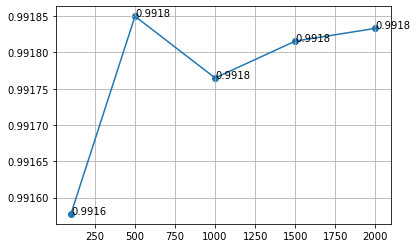

The confusion matrix for the test set is
[[9409  302]
 [4631 8198]]
Test Accuracy:: 0.7811446317657498
Test precision:: 0.9644705882352941
Test recall:: 0.6390209681191051
Test F1:: 0.7687186459749636


In [12]:
params = {'n_estimators':[100,500,1000,1500,2000]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

rfc = RandomForestClassifier(n_estimators = n_estimators)
rfc.fit(df_train,train_labels)
y_pred_rfc_chi_anova = rfc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_rfc_chi_anova))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_rfc_chi_anova))
print("Test precision::",precision_score(test_labels,y_pred_rfc_chi_anova))
print("Test recall::",recall_score(test_labels,y_pred_rfc_chi_anova))
print("Test F1::",f1_score(test_labels,y_pred_rfc_chi_anova))



<h2>3.7 GBDT Classifier</h2>

The average CV score against the five n_estimators values are: [0.97860248 0.98876939 0.99054957 0.99109729 0.99140767]
**************************************************
The plot of n_estimators vs F1 score


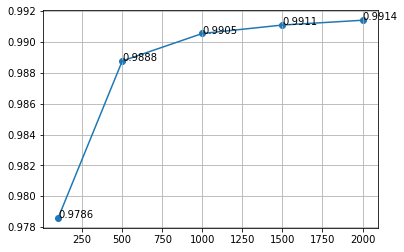

The confusion matrix for the test set is
[[9397  314]
 [4175 8654]]
Test Accuracy:: 0.8008429458740017
Test precision:: 0.9649866190900981
Test recall:: 0.6745654376802557
Test F1:: 0.7940542276460063


In [13]:
params = {'n_estimators':[100,500,1000,1500,2000]}
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

gbc = GradientBoostingClassifier(n_estimators = n_estimators)
gbc.fit(df_train,train_labels)
y_pred_gbc_chi_anova = gbc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gbc_chi_anova))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gbc_chi_anova))
print("Test precision::",precision_score(test_labels,y_pred_gbc_chi_anova))
print("Test recall::",recall_score(test_labels,y_pred_gbc_chi_anova))
print("Test F1::",f1_score(test_labels,y_pred_gbc_chi_anova))



<h2>3.8 MLP Classifier</h2>

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Dense(6256, activation = 'relu',kernel_initializer = 'he_normal',input_shape = (df_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())


optimizer = Adam(learning_rate=.001)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

history = model.fit(
   df_train,train_labels,    
   epochs =20, 
   verbose = 1, 
   validation_split = 0.3, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]
)

y_pred_mlp_chi_anova = model.predict_classes(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_mlp_chi_anova))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_mlp_chi_anova))
print("Test precision::",precision_score(test_labels,y_pred_mlp_chi_anova))
print("Test recall::",recall_score(test_labels,y_pred_mlp_chi_anova))
print("Test F1::",f1_score(test_labels,y_pred_mlp_chi_anova))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6256)              600576    
_________________________________________________________________
dropout (Dropout)            (None, 6256)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1601792   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

<h2>4. Modelling with features selected through PCA</h2>

In [24]:
df_train = pd.read_csv("df_train_pca.csv").drop(columns='Unnamed: 0')
df_test = pd.read_csv("df_test_pca.csv").drop(columns='Unnamed: 0')

<h2>4.1 Naive Bayes Classifier</h2>

The average CV score against the five var_smoothing values are: [0.88002627 0.88801634 0.89320402 0.8987007  0.88996152]
**************************************************
The plot of var_smoothing vs F1 score


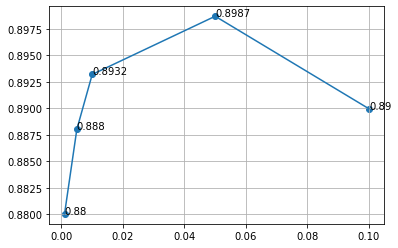

The confusion matrix for the test set is
[[9450  261]
 [5517 7312]]
Test Accuracy:: 0.7436557231588288
Test precision:: 0.9655354549055857
Test recall:: 0.5699586873489749
Test F1:: 0.7167924713263406


In [7]:

params = {'var_smoothing':[0.001,0.005,0.01,0.05,0.1]}
gnb = GaussianNB()
clf = GridSearchCV(gnb, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five var_smoothing values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of var_smoothing vs F1 score")

plt.plot(params['var_smoothing'],clf.cv_results_['mean_test_score'])
plt.scatter(params['var_smoothing'],clf.cv_results_['mean_test_score'])
for i in range(len(params['var_smoothing'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['var_smoothing'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
var_smoothing = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['var_smoothing']

gnb = GaussianNB(var_smoothing = var_smoothing)
gnb.fit(df_train,train_labels)
y_pred_gnb_pca = gnb.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gnb_pca))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gnb_pca))
print("Test precision::",precision_score(test_labels,y_pred_gnb_pca))
print("Test recall::",recall_score(test_labels,y_pred_gnb_pca))
print("Test F1::",f1_score(test_labels,y_pred_gnb_pca))

<h2> 4.2 KNN Classifier</h2>

The average CV score against the five n_neighbors values are: [0.99482437 0.99401278 0.99345703 0.99315749 0.99272053]
**************************************************
The plot of n_neighbors vs F1 score


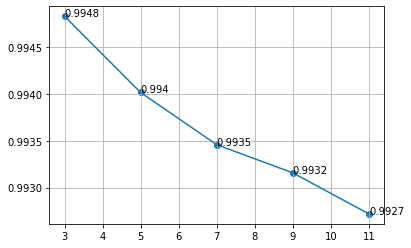

Test Accuracy:: 0.7815439219165927
Test precision:: 0.9242245357947837
Test recall:: 0.6712136565593577
Test F1:: 0.7776573647611307


In [9]:
params = {'n_neighbors':[3,5,7,9,11]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params,scoring='f1', n_jobs=-1)
clf.fit(df_train,train_labels)

print("The average CV score against the five n_neighbors values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_neighbors vs F1 score")

plt.plot(params['n_neighbors'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_neighbors'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_neighbors'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_neighbors'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_neighbors = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_neighbors']

knn = KNeighborsClassifier(n_neighbors = n_neighbors)
knn.fit(df_train,train_labels)
y_pred_knn_pca = knn.predict(df_test)



print("Test Accuracy::",accuracy_score(test_labels,y_pred_knn_pca))
print("Test precision::",precision_score(test_labels,y_pred_knn_pca))
print("Test recall::",recall_score(test_labels,y_pred_knn_pca))
print("Test F1::",f1_score(test_labels,y_pred_knn_pca))

In [10]:
print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_knn_pca))

The confusion matrix for the test set is
[[9005  706]
 [4218 8611]]


<h2>4.3 Logistic Regression Classifier</h2>

The average CV score against the five C values are: [0.96643598 0.96628426 0.96735457 0.95957116 0.89809036]
**************************************************
The plot of C vs F1 score


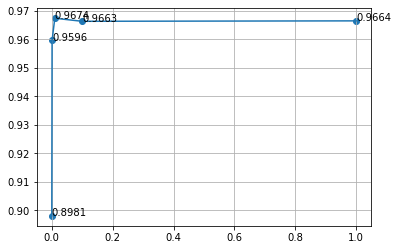

**************************************************
The confusion matrix for the test set is
[[8986  725]
 [5014 7815]]
Test Accuracy:: 0.7453859804791482
Test precision:: 0.9151053864168618
Test recall:: 0.6091667316236651
Test F1:: 0.7314333848097712


In [11]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
lr = LogisticRegression()
clf = GridSearchCV(lr, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()
print("*"*50)
#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
lr = LogisticRegression(C = C)
lr.fit(df_train,train_labels)
y_pred_lr_pca = lr.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_lr_pca))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_lr_pca))
print("Test precision::",precision_score(test_labels,y_pred_lr_pca))
print("Test recall::",recall_score(test_labels,y_pred_lr_pca))
print("Test F1::",f1_score(test_labels,y_pred_lr_pca))

<h2>4.4 Support Vector Classifier</h2>

The average CV score against the five C values are: [0.98554803 0.98063216 0.97320287 0.96236446 0.9012933 ]
**************************************************
The plot of C vs F1 score


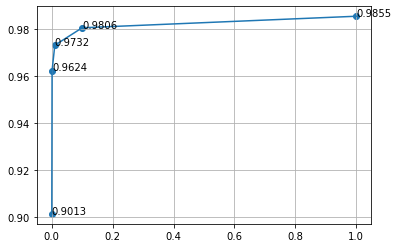

The confusion matrix for the test set is
[[9012  699]
 [4559 8270]]
Test Accuracy:: 0.7667258207630878
Test precision:: 0.9220648901772773
Test recall:: 0.6446332527866553
Test F1:: 0.7587852096522617


In [12]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
svc = SVC()
clf = GridSearchCV(svc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
svc = SVC(C = C)
svc.fit(df_train,train_labels)
y_pred_svc_pca = svc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_svc_pca))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_svc_pca))
print("Test precision::",precision_score(test_labels,y_pred_svc_pca))
print("Test recall::",recall_score(test_labels,y_pred_svc_pca))
print("Test F1::",f1_score(test_labels,y_pred_svc_pca))

<h2>4.5 Decision Tree Classifier</h2>

The average CV score against the five min_samples_split values are: [0.99383351 0.99382458 0.99369568 0.99348191 0.99326898]
**************************************************
The plot of min_samples_split vs F1 score


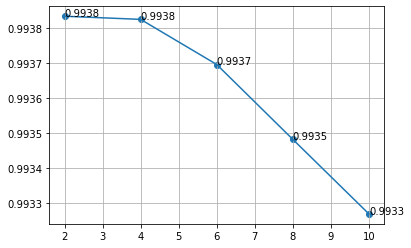

The confusion matrix for the test set is
[[9127  584]
 [3873 8956]]
Test Accuracy:: 0.80226264418811
Test precision:: 0.9387840670859539
Test recall:: 0.6981058539247018
Test F1:: 0.8007510393848629


In [13]:
params = {'min_samples_split':[2,4,6,8,10]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five min_samples_split values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of min_samples_split vs F1 score")

plt.plot(params['min_samples_split'],clf.cv_results_['mean_test_score'])
plt.scatter(params['min_samples_split'],clf.cv_results_['mean_test_score'])
for i in range(len(params['min_samples_split'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['min_samples_split'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
min_samples_split = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['min_samples_split']

dtc = DecisionTreeClassifier(min_samples_split = min_samples_split)
dtc.fit(df_train,train_labels)
y_pred_dtc_pca = dtc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_dtc_pca))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_dtc_pca))
print("Test precision::",precision_score(test_labels,y_pred_dtc_pca))
print("Test recall::",recall_score(test_labels,y_pred_dtc_pca))
print("Test F1::",f1_score(test_labels,y_pred_dtc_pca))


<h2>4.6 Random Forest Classifier</h2>

The average CV score against the five n_estimators values are: [0.99634519 0.99635388 0.99637965 0.99643927 0.99636242]
**************************************************
The plot of n_estimators vs F1 score


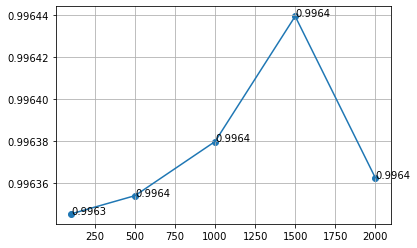

The confusion matrix for the test set is
[[9455  256]
 [4373 8456]]
Test Accuracy:: 0.7946317657497781
Test precision:: 0.970615243342516
Test recall:: 0.659131654844493
Test F1:: 0.7851074694768116


In [14]:
params = {'n_estimators':[100,500,1000,1500,2000]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

rfc = RandomForestClassifier(n_estimators = n_estimators)
rfc.fit(df_train,train_labels)
y_pred_rfc_pca = rfc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_rfc_pca))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_rfc_pca))
print("Test precision::",precision_score(test_labels,y_pred_rfc_pca))
print("Test recall::",recall_score(test_labels,y_pred_rfc_pca))
print("Test F1::",f1_score(test_labels,y_pred_rfc_pca))

<h2>4.7 GBDT Classifier</h2>

The average CV score against the five n_estimators values are: [0.98589765 0.99338579 0.99467313 0.99493862 0.99507511]
**************************************************
The plot of n_estimators vs F1 score


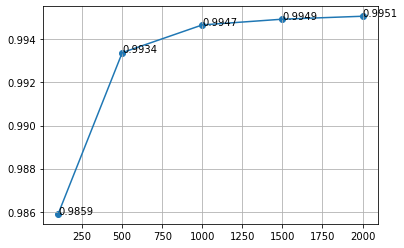

The confusion matrix for the test set is
[[9428  283]
 [4086 8743]]
Test Accuracy:: 0.8061668145519078
Test precision:: 0.9686461333924219
Test recall:: 0.6815028451165328
Test F1:: 0.800091512239762


In [25]:
params = {'n_estimators':[100,500,1000,1500,2000]}
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

gbc = GradientBoostingClassifier(n_estimators = n_estimators)
gbc.fit(df_train,train_labels)
y_pred_gbc_pca = gbc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gbc_pca))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gbc_pca))
print("Test precision::",precision_score(test_labels,y_pred_gbc_pca))
print("Test recall::",recall_score(test_labels,y_pred_gbc_pca))
print("Test F1::",f1_score(test_labels,y_pred_gbc_pca))

<h2>4.8 MLP Classifier</h2>

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Dense(6256, activation = 'relu',kernel_initializer = 'he_normal',input_shape = (df_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())


optimizer = Adam(learning_rate=.001)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

history = model.fit(
   df_train,train_labels,    
   epochs =20, 
   verbose = 1, 
   validation_split = 0.3, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]
)

y_pred_mlp_pca = model.predict_classes(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_mlp_pca))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_mlp_pca))
print("Test precision::",precision_score(test_labels,y_pred_mlp_pca))
print("Test recall::",recall_score(test_labels,y_pred_mlp_pca))
print("Test F1::",f1_score(test_labels,y_pred_mlp_pca))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6256)              193936    
_________________________________________________________________
dropout (Dropout)            (None, 6256)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1601792   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

<h2>5. Modelling with features selected through Auto-Encoder</h2>

In [4]:
df_train = pd.read_csv("df_train_ae.csv").drop(columns='Unnamed: 0')
df_test = pd.read_csv("df_test_ae.csv").drop(columns='Unnamed: 0')

In [5]:
df_train.shape, df_test.shape, train_labels.shape, test_labels.shape

((125963, 10), (22540, 10), (125963,), (22540,))

<h2>5.1 Naive Bayes Classifier</h2>

The average CV score against the five var_smoothing values are: [0.99274872 0.99256459 0.99247228 0.99199966 0.99176323]
**************************************************
The plot of var_smoothing vs F1 score


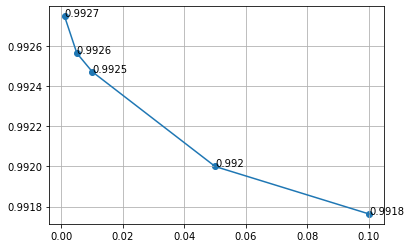

The confusion matrix for the test set is
[[9422  289]
 [3773 9056]]
Test Accuracy:: 0.8197870452528838
Test precision:: 0.9690743713215624
Test recall:: 0.7059006937407436
Test F1:: 0.8168124830883015


In [55]:
params = {'var_smoothing':[0.001,0.005,0.01,0.05,0.1]}
gnb = GaussianNB()
clf = GridSearchCV(gnb, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five var_smoothing values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of var_smoothing vs F1 score")

plt.plot(params['var_smoothing'],clf.cv_results_['mean_test_score'])
plt.scatter(params['var_smoothing'],clf.cv_results_['mean_test_score'])
for i in range(len(params['var_smoothing'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['var_smoothing'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
var_smoothing = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['var_smoothing']

gnb = GaussianNB(var_smoothing = var_smoothing)
gnb.fit(df_train,train_labels)
y_pred_gnb_ae = gnb.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gnb_ae))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gnb_ae))
print("Test precision::",precision_score(test_labels,y_pred_gnb_ae))
print("Test recall::",recall_score(test_labels,y_pred_gnb_ae))
print("Test F1::",f1_score(test_labels,y_pred_gnb_ae))

<h2> 5.2 KNN Classifier</h2>

The average CV score against the five n_neighbors values are: [0.99668159 0.99658761 0.99636517 0.99627079 0.99627805]
**************************************************
The plot of n_neighbors vs F1 score


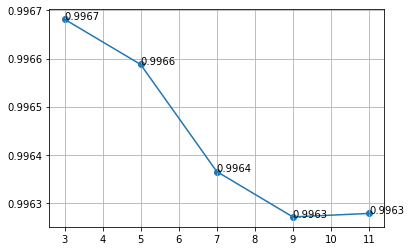

The confusion matrix for the test set is
[[9420  291]
 [3834 8995]]
Test Accuracy:: 0.8169920141969832
Test precision:: 0.9686625026922249
Test recall:: 0.7011458414529581
Test F1:: 0.8134750169568167


In [56]:
params = {'n_neighbors':[3,5,7,9,11]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params,scoring='f1', n_jobs=-1)
clf.fit(df_train,train_labels)

print("The average CV score against the five n_neighbors values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_neighbors vs F1 score")

plt.plot(params['n_neighbors'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_neighbors'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_neighbors'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_neighbors'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_neighbors = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_neighbors']

knn = KNeighborsClassifier(n_neighbors = n_neighbors)
knn.fit(df_train,train_labels)
y_pred_knn_ae = knn.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_knn_ae))


print("Test Accuracy::",accuracy_score(test_labels,y_pred_knn_ae))
print("Test precision::",precision_score(test_labels,y_pred_knn_ae))
print("Test recall::",recall_score(test_labels,y_pred_knn_ae))
print("Test F1::",f1_score(test_labels,y_pred_knn_ae))



<h2>5.3 Logistic Regression Classifier</h2>

The average CV score against the five C values are: [0.99194889 0.9919152  0.99227005 0.98949684 0.        ]
**************************************************
The plot of C vs F1 score


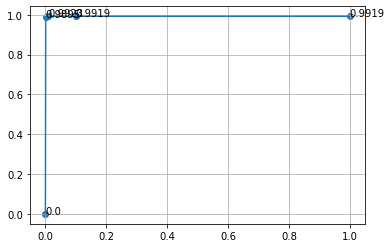

**************************************************
The confusion matrix for the test set is
[[9226  485]
 [3709 9120]]
Test Accuracy:: 0.8139307897071872
Test precision:: 0.9495054659031754
Test recall:: 0.7108893912230103
Test F1:: 0.8130516180797004


In [57]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
lr = LogisticRegression()
clf = GridSearchCV(lr, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()
print("*"*50)
#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
lr = LogisticRegression(C = C)
lr.fit(df_train,train_labels)
y_pred_lr_ae = lr.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_lr_ae))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_lr_ae))
print("Test precision::",precision_score(test_labels,y_pred_lr_ae))
print("Test recall::",recall_score(test_labels,y_pred_lr_ae))
print("Test F1::",f1_score(test_labels,y_pred_lr_ae))

<h2>5.4 Support Vector Classifier</h2>

The average CV score against the five C values are: [0.99478094 0.99280954 0.99270783 0.99270766 0.9919909 ]
**************************************************
The plot of C vs F1 score


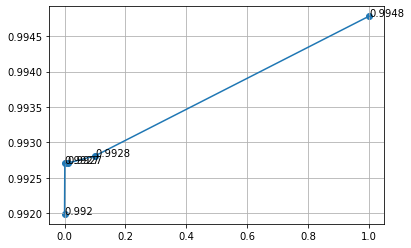

The confusion matrix for the test set is
[[9443  268]
 [3808 9021]]
Test Accuracy:: 0.8191659272404614
Test precision:: 0.971148670470449
Test recall:: 0.703172499805129
Test F1:: 0.8157157066642552


In [58]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
svc = SVC()
clf = GridSearchCV(svc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
svc = SVC(C = C)
svc.fit(df_train,train_labels)
y_pred_svc_ae = svc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_svc_ae))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_svc_ae))
print("Test precision::",precision_score(test_labels,y_pred_svc_ae))
print("Test recall::",recall_score(test_labels,y_pred_svc_ae))
print("Test F1::",f1_score(test_labels,y_pred_svc_ae))


<h2>5.5 Decision Tree Classifier</h2>

The average CV score against the five min_samples_split values are: [0.99575352 0.99560807 0.99550593 0.99551413 0.99561667]
**************************************************
The plot of min_samples_split vs F1 score


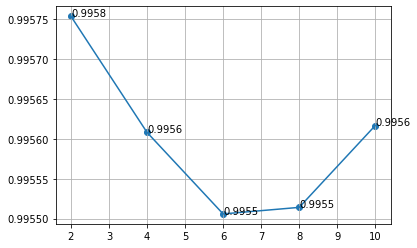

The confusion matrix for the test set is
[[9234  477]
 [3926 8903]]
Test Accuracy:: 0.8046583850931677
Test precision:: 0.9491471215351812
Test recall:: 0.6939745888221998
Test F1:: 0.8017470394884956


In [59]:
params = {'min_samples_split':[2,4,6,8,10]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five min_samples_split values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of min_samples_split vs F1 score")

plt.plot(params['min_samples_split'],clf.cv_results_['mean_test_score'])
plt.scatter(params['min_samples_split'],clf.cv_results_['mean_test_score'])
for i in range(len(params['min_samples_split'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['min_samples_split'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
min_samples_split = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['min_samples_split']

dtc = DecisionTreeClassifier(min_samples_split = min_samples_split)
dtc.fit(df_train,train_labels)
y_pred_dtc_ae = dtc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_dtc_ae))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_dtc_ae))
print("Test precision::",precision_score(test_labels,y_pred_dtc_ae))
print("Test recall::",recall_score(test_labels,y_pred_dtc_ae))
print("Test F1::",f1_score(test_labels,y_pred_dtc_ae))

<h2>5.6 Random Forest Classifier</h2>

The average CV score against the five n_estimators values are: [0.99700424 0.99700449 0.99696185 0.99699611 0.99698751]
**************************************************
The plot of n_estimators vs F1 score


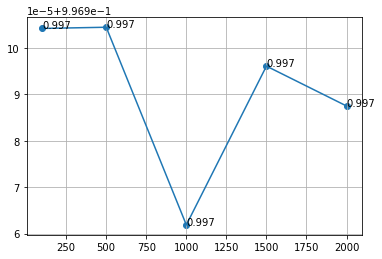

The confusion matrix for the test set is
[[9451  260]
 [3909 8920]]
Test Accuracy:: 0.8150399290150843
Test precision:: 0.971677559912854
Test recall:: 0.6952997115909268
Test F1:: 0.8105774910263983


In [6]:
params = {'n_estimators':[100,500,1000,1500,2000]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

rfc = RandomForestClassifier(n_estimators = n_estimators)
rfc.fit(df_train,train_labels)
y_pred_rfc_ae = rfc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_rfc_ae))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_rfc_ae))
print("Test precision::",precision_score(test_labels,y_pred_rfc_ae))
print("Test recall::",recall_score(test_labels,y_pred_rfc_ae))
print("Test F1::",f1_score(test_labels,y_pred_rfc_ae))

<h2>5.7 GBDT Classifier</h2>

The average CV score against the five n_estimators values are: [0.99604048 0.99586274 0.99605009 0.99610119 0.99597336]
**************************************************
The plot of n_estimators vs F1 score


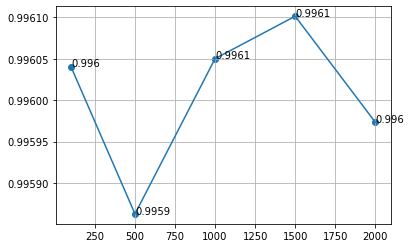

The confusion matrix for the test set is
[[9340  371]
 [3857 8972]]
Test Accuracy:: 0.8124223602484472
Test precision:: 0.960291127046987
Test recall:: 0.6993530282952686
Test F1:: 0.8093090384268447


In [5]:
params = {'n_estimators':[100,500,1000,1500,2000]}
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

gbc = GradientBoostingClassifier(n_estimators = n_estimators)
gbc.fit(df_train,train_labels)
y_pred_gbc_ae = gbc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gbc_ae))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gbc_ae))
print("Test precision::",precision_score(test_labels,y_pred_gbc_ae))
print("Test recall::",recall_score(test_labels,y_pred_gbc_ae))
print("Test F1::",f1_score(test_labels,y_pred_gbc_ae))

<h2>5.8 MLP Classifier</h2>

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Dense(6256, activation = 'relu',kernel_initializer = 'he_normal',input_shape = (df_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())


optimizer = Adam(learning_rate=.001)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

history = model.fit(
   df_train,train_labels,    
   epochs =20, 
   verbose = 1, 
   validation_split = 0.3, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]
)

y_pred_mlp_ae = model.predict_classes(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_mlp_ae))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_mlp_ae))
print("Test precision::",precision_score(test_labels,y_pred_mlp_ae))
print("Test recall::",recall_score(test_labels,y_pred_mlp_ae))
print("Test F1::",f1_score(test_labels,y_pred_mlp_ae))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6256)              68816     
_________________________________________________________________
dropout (Dropout)            (None, 6256)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1601792   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

<h2>6. Modelling with features selected through Recursive Feature Selection</h2>

In [4]:
df_train = pd.read_csv("df_train_rfe.csv").drop(columns='Unnamed: 0')
df_test = pd.read_csv("df_test_rfe.csv").drop(columns='Unnamed: 0')

In [34]:
df_train.shape, df_test.shape

((125963, 30), (22540, 30))

<h2>6.1 Naive Bayes Classifier</h2>

The average CV score against the five var_smoothing values are: [0.93333992 0.93546478 0.93678869 0.93517581 0.91377437]
**************************************************
The plot of var_smoothing vs F1 score


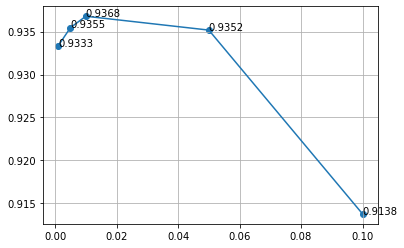

The confusion matrix for the test set is
[[8582 1129]
 [3941 8888]]
Test Accuracy:: 0.7750665483584738
Test precision:: 0.8872916042727363
Test recall:: 0.6928053628497934
Test F1:: 0.7780793136654119


In [8]:
params = {'var_smoothing':[0.001,0.005,0.01,0.05,0.1]}
gnb = GaussianNB()
clf = GridSearchCV(gnb, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five var_smoothing values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of var_smoothing vs F1 score")

plt.plot(params['var_smoothing'],clf.cv_results_['mean_test_score'])
plt.scatter(params['var_smoothing'],clf.cv_results_['mean_test_score'])
for i in range(len(params['var_smoothing'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['var_smoothing'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
var_smoothing = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['var_smoothing']

gnb = GaussianNB(var_smoothing = var_smoothing)
gnb.fit(df_train,train_labels)
y_pred_gnb_rfe = gnb.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gnb_rfe))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gnb_rfe))
print("Test precision::",precision_score(test_labels,y_pred_gnb_rfe))
print("Test recall::",recall_score(test_labels,y_pred_gnb_rfe))
print("Test F1::",f1_score(test_labels,y_pred_gnb_rfe))


<h2> 6.2 KNN Classifier</h2>

The average CV score against the five n_neighbors values are: [0.99622073 0.99558084 0.99528229 0.99470179 0.99463205]
**************************************************
The plot of n_neighbors vs F1 score


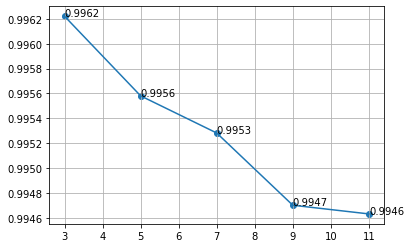

The confusion matrix for the test set is
[[8987  724]
 [4534 8295]]
Test Accuracy:: 0.7667258207630878
Test precision:: 0.9197250249473334
Test recall:: 0.6465819627406657
Test F1:: 0.7593372391065545


In [9]:
params = {'n_neighbors':[3,5,7,9,11]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params,scoring='f1', n_jobs=-1)
clf.fit(df_train,train_labels)

print("The average CV score against the five n_neighbors values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_neighbors vs F1 score")

plt.plot(params['n_neighbors'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_neighbors'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_neighbors'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_neighbors'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_neighbors = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_neighbors']

knn = KNeighborsClassifier(n_neighbors = n_neighbors)
knn.fit(df_train,train_labels)
y_pred_knn_rfe = knn.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_knn_rfe))


print("Test Accuracy::",accuracy_score(test_labels,y_pred_knn_rfe))
print("Test precision::",precision_score(test_labels,y_pred_knn_rfe))
print("Test recall::",recall_score(test_labels,y_pred_knn_rfe))
print("Test F1::",f1_score(test_labels,y_pred_knn_rfe))


<h2>6.3 Logistic Regression Classifier</h2>

The average CV score against the five C values are: [0.96485594 0.9651649  0.96636764 0.95806347 0.89828424]
**************************************************
The plot of C vs F1 score


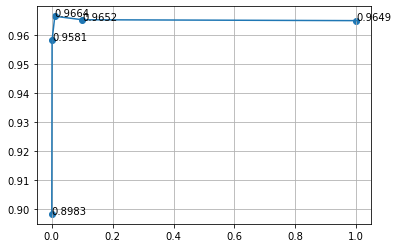

**************************************************
The confusion matrix for the test set is
[[8978  733]
 [5517 7312]]
Test Accuracy:: 0.7227151730257321
Test precision:: 0.9088875077688005
Test recall:: 0.5699586873489749
Test F1:: 0.7005844591357668


In [10]:

params = {'C':[1,0.1,0.01,0.001,0.0001]}
lr = LogisticRegression()
clf = GridSearchCV(lr, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()
print("*"*50)
#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
lr = LogisticRegression(C = C)
lr.fit(df_train,train_labels)
y_pred_lr_rfe = lr.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_lr_rfe))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_lr_rfe))
print("Test precision::",precision_score(test_labels,y_pred_lr_rfe))
print("Test recall::",recall_score(test_labels,y_pred_lr_rfe))
print("Test F1::",f1_score(test_labels,y_pred_lr_rfe))

<h2>6.4 Support Vector Classifier</h2>

The average CV score against the five C values are: [0.98465213 0.97824884 0.97341045 0.96307878 0.8938299 ]
**************************************************
The plot of C vs F1 score


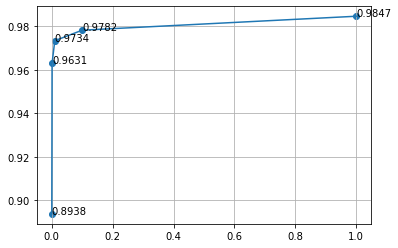

The confusion matrix for the test set is
[[8974  737]
 [4510 8319]]
Test Accuracy:: 0.7672138420585626
Test precision:: 0.9186174911660777
Test recall:: 0.6484527242965157
Test F1:: 0.7602467443454421


In [118]:
params = {'C':[1,0.1,0.01,0.001,0.0001]}
svc = SVC()
clf = GridSearchCV(svc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five C values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of C vs F1 score")
plt.plot(params['C'],clf.cv_results_['mean_test_score'])
plt.scatter(params['C'],clf.cv_results_['mean_test_score'])
for i in range(len(params['C'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['C'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
C = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['C']

#Training with the best value of the C
svc = SVC(C = C)
svc.fit(df_train,train_labels)
y_pred_svc_rfe = svc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_svc_rfe))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_svc_rfe))
print("Test precision::",precision_score(test_labels,y_pred_svc_rfe))
print("Test recall::",recall_score(test_labels,y_pred_svc_rfe))
print("Test F1::",f1_score(test_labels,y_pred_svc_rfe))

<h2>6.5 Decision Tree Classifier</h2>

The average CV score against the five min_samples_split values are: [0.99692172 0.99683602 0.99676756 0.99657982 0.996588  ]
**************************************************
The plot of min_samples_split vs F1 score


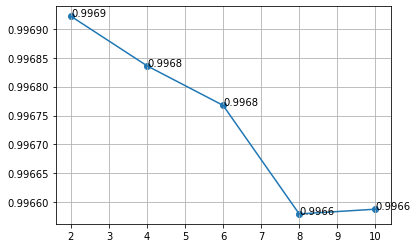

The confusion matrix for the test set is
[[8929  782]
 [4087 8742]]
Test Accuracy:: 0.7839840283939663
Test precision:: 0.9178916421671567
Test recall:: 0.6814248967183725
Test F1:: 0.7821768890081869


In [119]:

params = {'min_samples_split':[2,4,6,8,10]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five min_samples_split values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of min_samples_split vs F1 score")

plt.plot(params['min_samples_split'],clf.cv_results_['mean_test_score'])
plt.scatter(params['min_samples_split'],clf.cv_results_['mean_test_score'])
for i in range(len(params['min_samples_split'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['min_samples_split'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
min_samples_split = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['min_samples_split']

dtc = DecisionTreeClassifier(min_samples_split = min_samples_split)
dtc.fit(df_train,train_labels)
y_pred_dtc_rfe = dtc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_dtc_rfe))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_dtc_rfe))
print("Test precision::",precision_score(test_labels,y_pred_dtc_rfe))
print("Test recall::",recall_score(test_labels,y_pred_dtc_rfe))
print("Test F1::",f1_score(test_labels,y_pred_dtc_rfe))

<h2>6.6 Random Forest Classifier</h2>

The average CV score against the five n_estimators values are: [0.99789161 0.99801131 0.99800274 0.99805408 0.99804548]
**************************************************
The plot of n_estimators vs F1 score


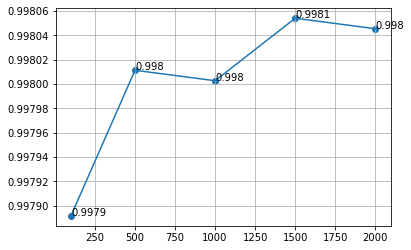

The confusion matrix for the test set is
[[9426  285]
 [4960 7869]]
Test Accuracy:: 0.7673025732031943
Test precision:: 0.9650478292862399
Test recall:: 0.6133759451243277
Test F1:: 0.7500357432207024


In [120]:
params = {'n_estimators':[100,500,1000,1500,2000]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

rfc = RandomForestClassifier(n_estimators = n_estimators)
rfc.fit(df_train,train_labels)
y_pred_rfc_rfe = rfc.predict(df_test)


print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_rfc_rfe))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_rfc_rfe))
print("Test precision::",precision_score(test_labels,y_pred_rfc_rfe))
print("Test recall::",recall_score(test_labels,y_pred_rfc_rfe))
print("Test F1::",f1_score(test_labels,y_pred_rfc_rfe))

<h2>6.7 GBDT Classifier</h2>

The average CV score against the five n_estimators values are: [0.99375187 0.99687604 0.99751647 0.99770456 0.99778127]
**************************************************
The plot of n_estimators vs F1 score


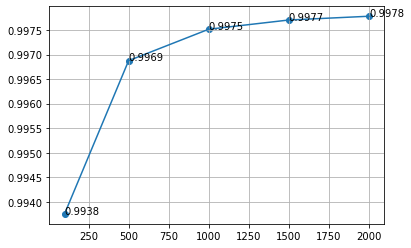

The confusion matrix for the test set is
[[9421  290]
 [4536 8293]]
Test Accuracy:: 0.7858917480035492
Test precision:: 0.9662122800885471
Test recall:: 0.6464260659443448
Test F1:: 0.774612366897067


In [5]:
params = {'n_estimators':[100,500,1000,1500,2000]}
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, params,scoring='f1')
clf.fit(df_train,train_labels)

print("The average CV score against the five n_estimators values are:",clf.cv_results_['mean_test_score'])
print("*"*50)
print("The plot of n_estimators vs F1 score")

plt.plot(params['n_estimators'],clf.cv_results_['mean_test_score'])
plt.scatter(params['n_estimators'],clf.cv_results_['mean_test_score'])
for i in range(len(params['n_estimators'])):
    plt.annotate(round(clf.cv_results_['mean_test_score'][i],4), (params['n_estimators'][i], clf.cv_results_['mean_test_score'][i]))
plt.grid()
plt.show()

#Getting the best value of the hyper-parameters
n_estimators = clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]['n_estimators']

gbc = GradientBoostingClassifier(n_estimators = n_estimators)
gbc.fit(df_train,train_labels)
y_pred_gbc_rfe = gbc.predict(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_gbc_rfe))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_gbc_rfe))
print("Test precision::",precision_score(test_labels,y_pred_gbc_rfe))
print("Test recall::",recall_score(test_labels,y_pred_gbc_rfe))
print("Test F1::",f1_score(test_labels,y_pred_gbc_rfe))

<h2>6.8 MLP Classifier</h2>

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = Sequential() 
model.add(Dense(256, activation = 'relu',kernel_initializer = 'he_normal',input_shape = (df_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer = 'he_normal'))  
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())


optimizer = Adam(learning_rate=.001)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

history = model.fit(
   df_train,train_labels,    
   epochs =20, 
   verbose = 1, 
   validation_split = 0.3, 
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]
)

y_pred_mlp_rfe = model.predict_classes(df_test)

print("The confusion matrix for the test set is")
print(confusion_matrix(test_labels,y_pred_mlp_rfe))

print("Test Accuracy::",accuracy_score(test_labels,y_pred_mlp_rfe))
print("Test precision::",precision_score(test_labels,y_pred_mlp_rfe))
print("Test recall::",recall_score(test_labels,y_pred_mlp_rfe))
print("Test F1::",f1_score(test_labels,y_pred_mlp_rfe))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

<h2>7. Auto-Encoder with all Features </h2>

In [90]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model


In [68]:
df_train = pd.read_csv("df_train_whole.csv").drop(columns='Unnamed: 0')
df_test = pd.read_csv("df_test_whole.csv").drop(columns='Unnamed: 0')
train_labels = df_train['class']
test_labels = df_test['class']
df_train.drop(columns='class',inplace=True)
df_test.drop(columns='class',inplace=True)

Epoch 1/10
264/264 [==============================] - 4s 11ms/step - loss: 0.5150 - val_loss: 0.0477
Epoch 2/10
264/264 [==============================] - 3s 10ms/step - loss: 0.1913 - val_loss: 0.0352
Epoch 3/10
264/264 [==============================] - 3s 10ms/step - loss: 0.1144 - val_loss: 0.0297
Epoch 4/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0677 - val_loss: 0.0265
Epoch 5/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0369 - val_loss: 0.0211
Epoch 6/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0250 - val_loss: 0.0176
Epoch 7/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0197 - val_loss: 0.0147
Epoch 8/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0167 - val_loss: 0.0128
Epoch 9/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0148 - val_loss: 0.0122
Epoch 10/10
264/264 [==============================] - 3s 10ms/step - loss: 0.0134 - val_lo

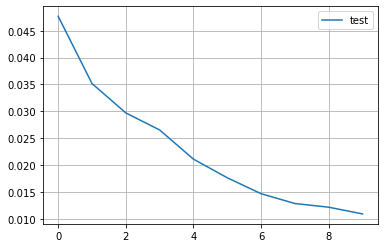

[[ 8224  1487]
 [  760 12069]]
Test Accuracy:: 0.9003105590062112
Test precision:: 0.8903068751844202
Test recall:: 0.9407592173980824
Test F1:: 0.914837976122797


In [69]:
df_train_preprocess_1 = df_train[(train_labels == 1).values]
df_train_preprocess_0 = df_train[(train_labels == 0).values]
df_test_preprocess_1 = df_test[(test_labels == 1).values]
df_test_preprocess_0 = df_test[(test_labels == 0).values]


n_inputs = df_train_preprocess_0.shape[1]

#Encoder
input_ = Input(shape=(n_inputs,))
e = Dense(n_inputs*2,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(input_)
e = Dropout(0.2)(e)
e = Dense(n_inputs,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(e)
e = Dropout(0.2)(e)
e = Dense(n_inputs,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(e)
e = Dropout(0.2)(e)
#Code
bottleneck = Dense(10)(e)
#Decoder
d = Dense(n_inputs,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(bottleneck)
d = Dropout(0.2)(d)
d = Dense(n_inputs,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(d)
d = Dropout(0.2)(d)
d = BatchNormalization()(d)
d = Dense(n_inputs*2,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(d)
d = Dropout(0.2)(d)
d = BatchNormalization()(d)
#Output
output = Dense(n_inputs, activation='linear')(d)

model = Model(inputs=input_, outputs=output)
optimizer = Adam(learning_rate=.0005)
model.compile(optimizer=optimizer, loss='mse')

plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)


earlystop1 = tensorflow.keras.callbacks.EarlyStopping(monitor = 'loss', 
                            mode="auto",
                            min_delta = 0.0001, 
                            patience = 5,
                            verbose = 1)

history = model.fit(df_train_preprocess_0, df_train_preprocess_0, epochs=10, batch_size=256, verbose=1, validation_data=(df_test_preprocess_0,df_test_preprocess_0),callbacks=[earlystop1])

model.save('encoder_full.h5')
model = load_model('encoder_full.h5')

#pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.grid()
pyplot.legend()
pyplot.show()

threshold = history.history["loss"][-1]


#Getting the error for the test dataset
#df_test_preprocess
df_test_preprocess_predict = model.predict(df_test)
diff_arr = df_test_preprocess_predict - df_test.values
sqr_error_arr = np.sum(diff_arr**2,axis=1)/120
test_predict_label = np.where(sqr_error_arr > threshold, 1, 0)
    

print(confusion_matrix(test_labels,test_predict_label))

print("Test Accuracy::",accuracy_score(test_labels,test_predict_label))
print("Test precision::",precision_score(test_labels, test_predict_label))
print("Test recall::",recall_score(test_labels, test_predict_label))
print("Test F1::",f1_score(test_labels, test_predict_label))

Conclusion:
Out of all the models that we have tried with various feature selection techniques, it can be clearly seen that the AE which is trained with the normal data gives the best accuracy on the test data of 90 percent which stands way ahead of the classical ML techniques. Hence this model would be put to production